# Find the value of a variable at the times when another variable is maximum
## Claire Carouge

### Let's say you have two variables that vary in space and time. You can easily calculate the maximum in time for each spatial point of one variable. Now, you would like to know what are the values of the second variable at the same time the first reaches a maximum. And this, for each spatial point. 

It is relatively easy to do with two variables of the same rank as that is what the `where()` function is designed for. But this problem is more complicated with variables of different ranks. For example if you want to find the times when each point in space equals the maximum value.
In this blog, we'll first look at the problem when both variables have the same rank and then we'll look at the problem to find the times of the maxima.

We first need to import some packages, read in some data and calculate the maximum in time at all spatial points. As usual, I'm going to use CMIP data as it's easily accessible.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np

In [2]:
# Let's get the 2m temperature and the sensible heat flux.
# We do not want to decode the time unit. 
# as datetime objects can't be plotted.
ds = xr.open_dataset('/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc',
                        decode_times=False)
ds1 = xr.open_dataset('/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/hfss/hfss_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc',
                        decode_times=False)
tas = ds.tas
hfss = ds1.hfss

In [3]:
tas

<xarray.DataArray 'tas' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-01-18T23:37:46Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [4]:
hfss

<xarray.DataArray 'hfss' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     surface_upward_sensible_heat_flux
    long_name:         Surface Upward Sensible Heat Flux
    units:             W m-2
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-01-15T11:36:06Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [5]:
# Calculate the maximum temperature at each spatial point along the time axis:
tas_max=tas.max('time')
tas_max

<xarray.DataArray 'tas' (lat: 145, lon: 192)>
array([[258.12787, 258.12787, 258.12787, ..., 258.12787, 258.12787, 258.12787],
       [259.0565 , 259.0456 , 259.02908, ..., 259.0787 , 259.07742, 259.07217],
       [259.79144, 259.71857, 259.64832, ..., 260.0159 , 259.9404 , 259.86655],
       ...,
       [273.00952, 273.0114 , 273.0609 , ..., 273.01083, 273.00726, 273.0072 ],
       [273.2563 , 273.26328, 273.27258, ..., 273.25238, 273.25394, 273.25162],
       [273.18732, 273.18732, 273.18732, ..., 273.18732, 273.18732, 273.18732]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...

## Variables of the same dimensionality

#### Now we want to find the values of the sensible heat flux when the 2m temperature is maximum.

<xarray.DataArray (time: 1872, lat: 145, lon: 192)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 1.5
Attributes:
    standard_name: 

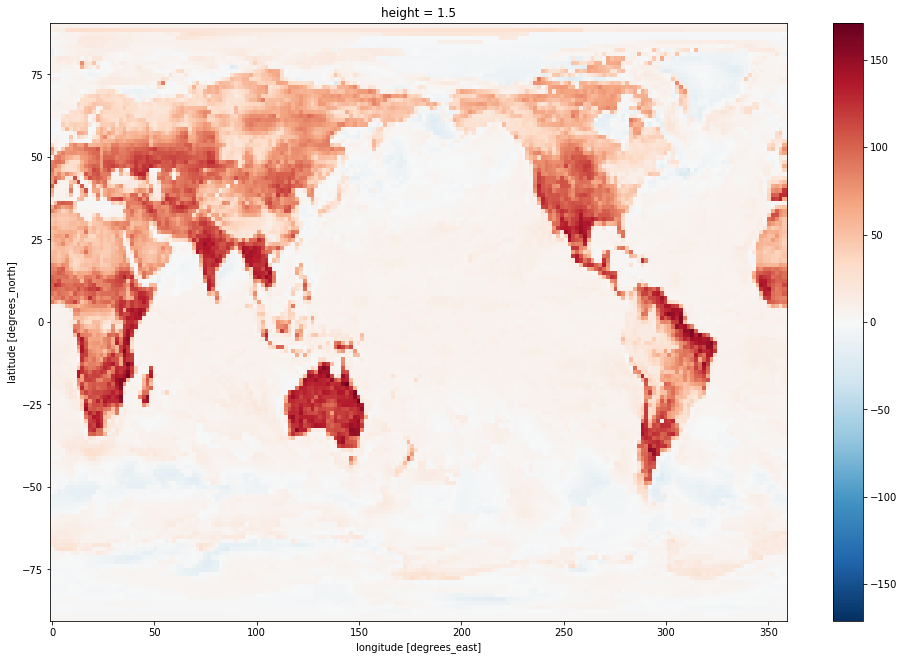

In [11]:
# Get the values of the sensible heat flux when temperature is maximum
hfss_at_max= hfss.where(tas == tas_max)
hfss_at_max.mean('time').plot(size=11)
hfss_at_max

#### As you can see, hfss_at_max as the same dimensions as the initial arrays (hfss and tas) but with a lot of missing values. Only the times and spatial points where tas is maximum will have values. So you need to then sample in some way that makes sense for your analysis to plot it. Here we arbitrarily chose to plot the mean in time.

## Variables of different dimensionality

There are 2 ways to go. The first solution is simply to get back to the previous case by broadcasting the variable with less dimensions onto the dimensions of the other variable.
The second solution is specific to `xarray` and uses the `groupby().apply()` workflow.

To illustrate both solutions, we are going to look at the problem of finding at what times the 2m temperature is maximum at each point

### Solution 1: Broadcasting time to space

`xarray` comes with a `broadcast()` function with this description:
> Explicitly broadcast any number of DataArray or Dataset objects against one another.
> 
> xarray objects automatically broadcast against each other in arithmetic operations, so this function should not be necessary for normal use.
> 
> If no change is needed, the input data is returned to the output without being copied.

As the text says, this function is rarely needed but it's still there and can be useful. Contrary to other broadcast functions, it doesn't need information on the dimensions and which dimension to broadcast where. This is because it expects DataArray and Dataset objects which have fully documented dimensions. So the function will take all the arrays passed to it and return all of them with the same dimensions.

In [7]:
d,time3d = xr.broadcast(tas, tas.time)
# Here we want to broadcast tas.time to the dimensions of tas. 
# So tas isn't changed but is returned as is in DataArray d. Which is not a copy 
# (any change to d will be in tas as well)
# On the contrary tas.time is modified and returned as time3d, which has the same dimensionality as tas

In [8]:
time3d

<xarray.DataArray 'time' (time: 1872, lat: 145, lon: 192)>
array([[[675348.5, 675348.5, ..., 675348.5, 675348.5],
        [675348.5, 675348.5, ..., 675348.5, 675348.5],
        ...,
        [675348.5, 675348.5, ..., 675348.5, 675348.5],
        [675348.5, 675348.5, ..., 675348.5, 675348.5]],

       [[675378. , 675378. , ..., 675378. , 675378. ],
        [675378. , 675378. , ..., 675378. , 675378. ],
        ...,
        [675378. , 675378. , ..., 675378. , 675378. ],
        [675378. , 675378. , ..., 675378. , 675378. ]],

       ...,

       [[732265. , 732265. , ..., 732265. , 732265. ],
        [732265. , 732265. , ..., 732265. , 732265. ],
        ...,
        [732265. , 732265. , ..., 732265. , 732265. ],
        [732265. , 732265. , ..., 732265. , 732265. ]],

       [[732295.5, 732295.5, ..., 732295.5, 732295.5],
        [732295.5, 732295.5, ..., 732295.5, 732295.5],
        ...,
        [732295.5, 732295.5, ..., 732295.5, 732295.5],
        [732295.5, 732295.5, ..., 732295.5, 7

**Now we can use the same method as above. This time comparing time3d and tas, instead of hfss and tas.**

<xarray.DataArray (time: 1872, lat: 145, lon: 192)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
    height   float64 1.5
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    bounds:         time_bnds
    

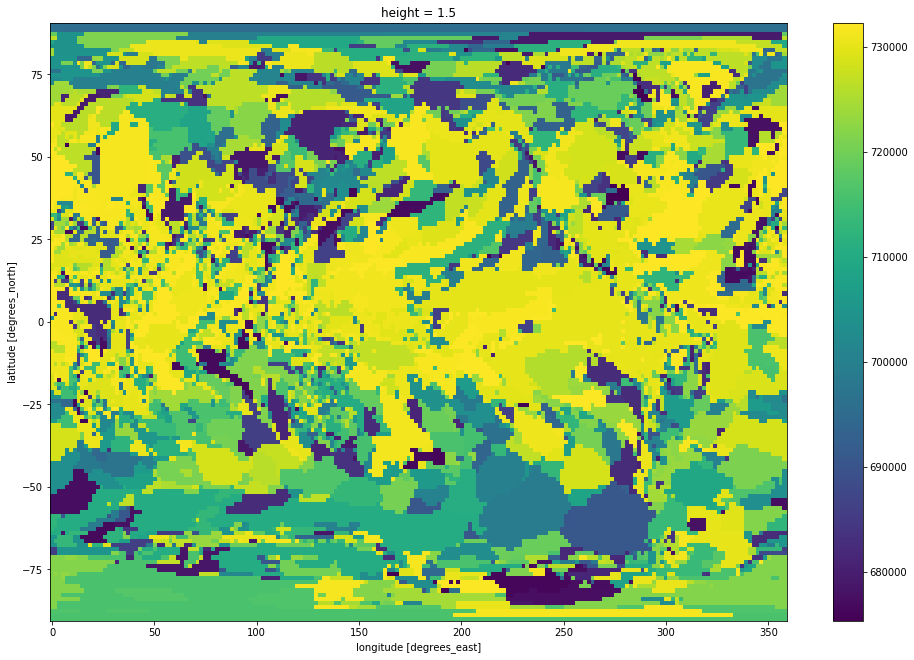

In [9]:
time_at_max= time3d.where(tas == tas_max)
time_at_max.min('time').plot(size=11)
time_at_max

**Note:** The time unit is number of days since 0001-01-01, so one would have to convert to a more usable format for scientific usage

## Solution 2: `groupby().apply()` workflow

The idea here is to use `groupby()` to efficiently cycle through each date of the dataset and then apply a simple function which returns the time value if the data is maximum or NaN otherwise.

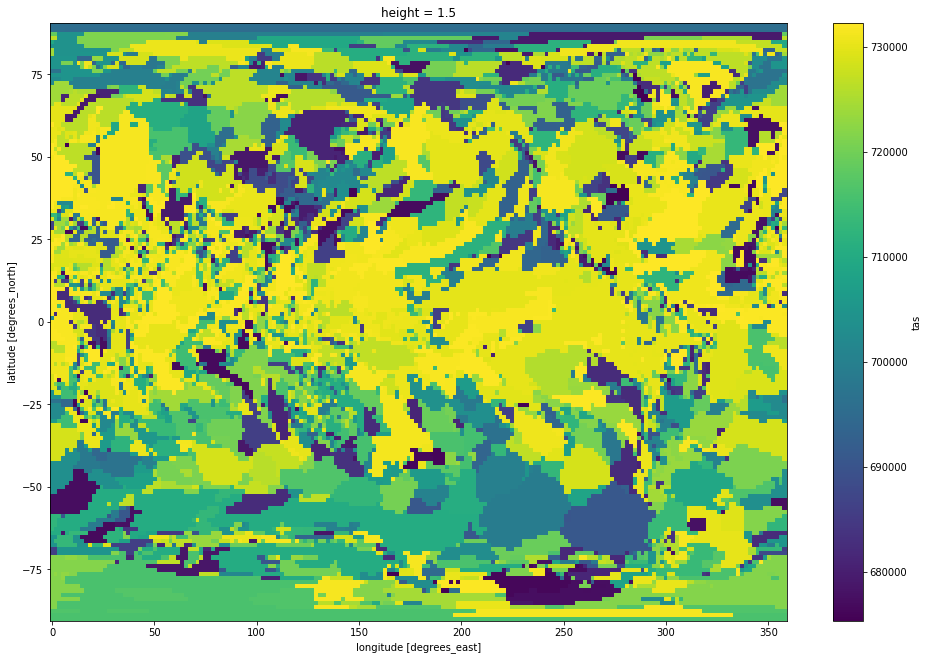

In [10]:
def check_max(data):
    return np.where(data == tas_max, data.time, np.nan)

tasmax_dates = tas.groupby('time').apply(check_max)
tasmax_dates.min('time').plot(size=11)

## Solution 1 vs Solution 2: which is the best?

As you see, both solutions give the same result (obviously!). Which solution should you use? Both have pros and cons. 
Solution 1 is not specific to `xarray`, numpy arrays can also be broadcasted. At the same time, it is very easy to transform a numpy array in a minimal DataArray and then apply the solution 2 to it.
For this particular example, it turns out solution 1 is 3-6 times faster than solution 2. But this might depend a lot on the exact problem you are looking at.
In particular, the solution 2 is more generic as one can define whatever function is needed.

In summary, it is better to use functions already defined in the package if possible as you'll probably get a faster code. But solution 2 is interesting to know as it can extend the capabilities beyond the possibilities of the built-in functions.